In [5]:
#new_data = create_new_folder()

In [8]:
names = os.listdir('New folder/train')
path = 'New folder/train/'
def load_images():
    IMAGE_SIZE = 100
    data_dict = {}
    target = []
    for i, name in enumerate(names):
        images = []
        for image in os.listdir(os.path.join(path, name)):
            image_path = os.path.join(path,name,image)
            img = cv2.imread(image_path)
            resize = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
            gray = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
            scaled = gray/255.0
            images.append(scaled)
            target.append(i)
        data_dict[name] = images
        print('Photos Of', name , 'Uloaded Successfully With Augmantaion')
    data_dict['target'] = target
    return data_dict

In [9]:
data = load_images()

Photos Of Amr@gmail.com Uloaded Successfully With Augmantaion
Photos Of mostafathemar@gmail.com Uloaded Successfully With Augmantaion
Photos Of Omar@gmail.com Uloaded Successfully With Augmantaion
Photos Of Sadek@gmail.com Uloaded Successfully With Augmantaion


In [12]:
keys = data.keys()
len(keys)

5

In [13]:
#x = [key for key in keys if key != 'target'] # List Comprehensions
x = [img for key in data if key != 'target' for img in data[key]]
x_array = np.array(x)
print(f'Loaded {len(x)} images')

Loaded 13565 images


In [14]:
num_names = len(names)
y = data['target']
y_cat = to_categorical(y, num_names)

In [15]:
x_train,x_test,y_train, y_test = train_test_split(x_array ,y_cat , test_size = 0.3,random_state=42)

print('Train Features shape: ', x_train.shape)
print('Test Features shape: ', x_test.shape)
print('Train Labels shape: ', y_train.shape)
print('Test Labels shape: ', y_test.shape)

Train Features shape:  (9495, 100, 100, 3)
Test Features shape:  (4070, 100, 100, 3)
Train Labels shape:  (9495, 4)
Test Labels shape:  (4070, 4)


In [16]:
IMAGE_SIZE = [100,100]
LEARNING_RATE = 0.0001
MOMENTUM = 0.9
REGULARIZATION_RATE = 0.001
DROPOUT_RATE = 0.35

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False
    
x = Flatten()(vgg.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(REGULARIZATION_RATE))(x)
x = Dropout(DROPOUT_RATE)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(REGULARIZATION_RATE))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(REGULARIZATION_RATE))(x)
x = Dropout(0.15)(x)
x = BatchNormalization()(x)
prediction = Dense(num_names, activation='softmax')(x)

In [17]:
model = Model(inputs = vgg.input, outputs = prediction)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [19]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = 'accuracy')

In [20]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=5,restore_best_weights=True)

# Learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, / 
                              patience=5, min_lr=0.001)

In [21]:
history= model.fit(x_train, y_train, batch_size=64,
                   epochs = 20,validation_data=(x_test,y_test),callbacks = [early_stop],shuffle=True)

Epoch 1/20
149/149 [==============================] - 702s 5s/step - loss: 1.0543 - accuracy: 0.9525 - val_loss: 0.7442 - val_accuracy: 0.9902
Epoch 2/20
149/149 [==============================] - 506s 3s/step - loss: 0.6541 - accuracy: 0.9846 - val_loss: 0.5520 - val_accuracy: 0.9909
Epoch 3/20
149/149 [==============================] - 384s 3s/step - loss: 0.5118 - accuracy: 0.9835 - val_loss: 0.4572 - val_accuracy: 0.9853
Epoch 4/20
149/149 [==============================] - 417s 3s/step - loss: 0.4026 - accuracy: 0.9841 - val_loss: 0.3314 - val_accuracy: 0.9968
Epoch 5/20
149/149 [==============================] - 512s 3s/step - loss: 0.3369 - accuracy: 0.9840 - val_loss: 0.4069 - val_accuracy: 0.9474
Epoch 6/20
149/149 [==============================] - 545s 4s/step - loss: 0.2723 - accuracy: 0.9854 - val_loss: 0.2854 - val_accuracy: 0.9762
Epoch 7/20
149/149 [==============================] - 579s 4s/step - loss: 0.2413 - accuracy: 0.9831 - val_loss: 0.2492 - val_accuracy: 0.9759

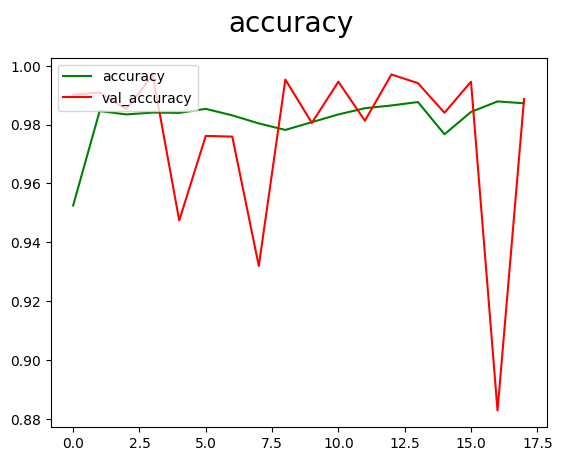

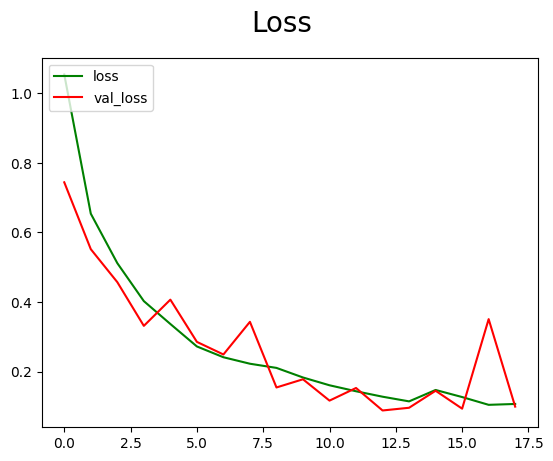

In [22]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='green', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color= 'red', label = 'val_accuracy')
fig.suptitle('accuracy',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['loss'], color='green', label = 'loss')
plt.plot(history.history['val_loss'], color= 'red', label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

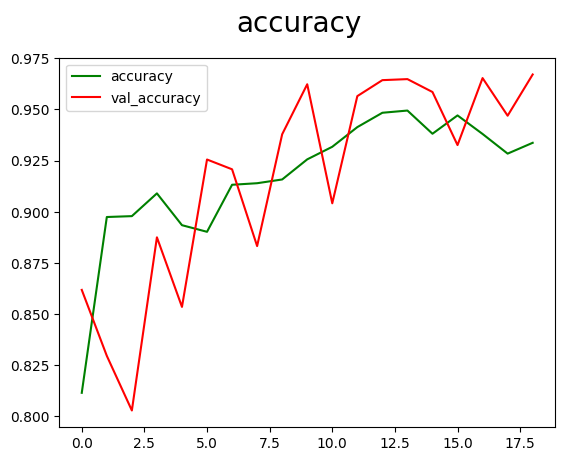

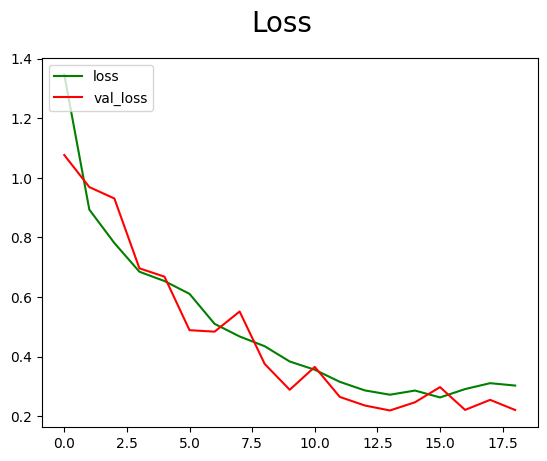

In [18]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='green', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color= 'red', label = 'val_accuracy')
fig.suptitle('accuracy',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['loss'], color='green', label = 'loss')
plt.plot(history.history['val_loss'], color= 'red', label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [23]:
train_score = model.evaluate(x_train[:1000], y_train[:1000], batch_size=64)
print(train_score)

print('----------------Training Complete-----------------')

test_score = model.evaluate(x_test[:500], y_test[:500], batch_size = 32)
print(test_score)

16/16 [==============================] - 29s 2s/step - loss: 0.0821 - accuracy: 1.0000
[0.08207972347736359, 1.0]
----------------Training Complete-----------------
16/16 [==============================] - 16s 1s/step - loss: 0.0851 - accuracy: 0.9980
[0.08513869345188141, 0.9980000257492065]


In [31]:
pred = model.predict(np.expand_dims(resize/255 , 0 ))

1/1 [==============================] - 0s 94ms/step


In [32]:
np.argmax(pred)

1

In [33]:
import pickle
# Save the trained model as a pickle file
with open('vgg19.pkl', 'wb') as file:
    pickle.dump(model, file)

In [27]:
model.save('vgg19.h5')

In [38]:
labels = [i for i in range (len(names))]
df = pd.DataFrame(names,labels)
df
try: df.to_pickle('label_to_categorical')
except:print('File was created')

In [37]:
df

,0
0,Amr@gmail.com
1,mostafathemar@gmail.com
2,Omar@gmail.com
3,Sadek@gmail.com
